#### File describe qulity test for EPR spectra in MarS

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import math
from importlib import reload

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import mars

import pandas as pd

In [2]:
dtype = torch.float64

In [3]:
def read_csv(name: str):
    df = pd.read_csv(f".\easy_spin_checked\{name}.csv", names=["fields", "spectrum"]).to_numpy()
    return df[:, 0], df[:, 1]

### System_1

Text(0.5, 1.0, 'spectra_1')

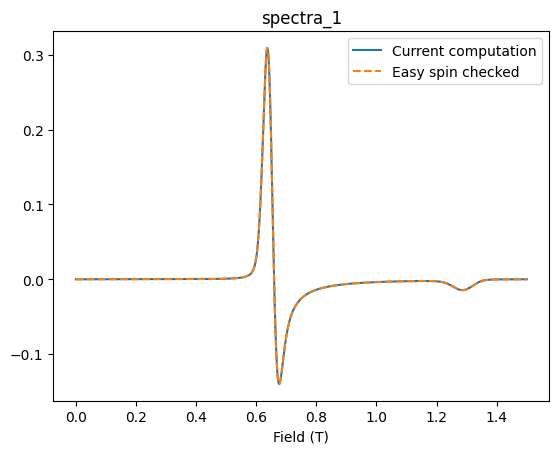

In [97]:
name = "spectra_1"

g_interaction = mars.spin_model.Interaction(2.1, dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([1e6 * 1e6, 1e3 * 1e6], dtype=dtype)
freq = 38.0 * 1e9
gauss = 1e-2
lorentz = 1e-2
ham_strain = 2 * 1e9
temp = 3.5

spin_system = mars.spin_model.SpinSystem(
    electrons=[3/2],
    g_tensors=[g_interaction],
    electron_electron=[(0, 0, DE_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(40,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(0, 1.5, 1000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)



plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [74]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

1000000000000.0 1000000000.0


### System_2

Text(0.5, 1.0, 'spectra_2')

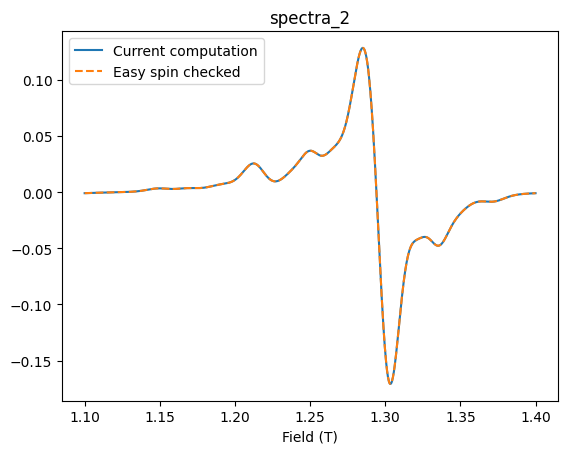

In [109]:
name = "spectra_2"

g_1_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype)
g_2_interaction = mars.spin_model.Interaction(2.1, dtype=dtype)

dipolar_interaction = mars.spin_model.DEInteraction([1e6 * 1e3, 0.0], dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([1e6 * 1e3, 0.0], dtype=dtype)

freq = 38.0 * 1e9
gauss = 1e-2
lorentz = 1e-2
ham_strain = 2 * 1e6 * 100
temp = 100

spin_system = mars.spin_model.SpinSystem(
    electrons=[1/2, 3/2],
    g_tensors=[g_1_interaction, g_2_interaction],
    electron_electron=[(1, 1, DE_interaction), (0, 1, dipolar_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(40,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(1.1, 1.4, 1000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [110]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

{(1, 1): Principal values: [-3.33e+08, -3.33e+08, 6.67e+08]
Frame (Euler angles): [α=0.000, β=0.000, γ=0.000] rad
Strain: None}
1
1000000000.0 0.0


### System_3

Text(0.5, 1.0, 'spectra_3')

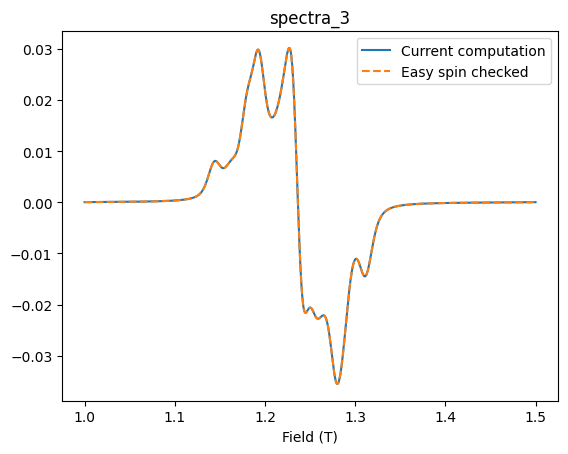

In [7]:
name = "spectra_3"

g_1_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype)
g_2_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype, frame=[1.0, 1.0, 1.0])

J_interaction = mars.spin_model.Interaction(mars.constants.unit_converter(2 * 5, "cm-1_to_Hz"), dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([3 * 1e6 * 1e3, 0.0], dtype=dtype)

freq = 38.0 * 1e9
gauss = 1e-2
lorentz = 1e-2
ham_strain = 0.0
temp = 100

spin_system = mars.spin_model.SpinSystem(
    electrons=[1/2, 2.0/2],
    g_tensors=[g_1_interaction, g_2_interaction],
    electron_electron=[(1, 1, DE_interaction), (0, 1, J_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(40,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(1.0, 1.5, 1000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [8]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

{(1, 1): Principal values: [-1.00e+09, -1.00e+09, 2.00e+09]
Frame (Euler angles): [α=0.000, β=0.000, γ=0.000] rad
Strain: None}
1
3000000000.0 0.0


### System_4

Text(0.5, 1.0, 'spectra_4')

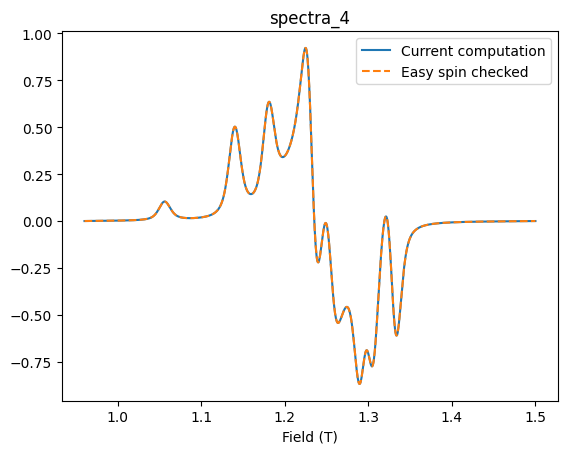

In [18]:
name = "spectra_4"

g_1_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype)
g_2_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype)

J_interaction = mars.spin_model.Interaction(mars.constants.unit_converter(-6, "cm-1_to_Hz"), dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([5.99 * 1e3 * 1e6, 0.89 * 1e3 * 1e6], dtype=dtype)

freq = 38.0 * 1e9
gauss = 1e-2
lorentz = 1e-2
ham_strain = 0.0
temp = 3.5

spin_system = mars.spin_model.SpinSystem(
    electrons=[1/2, 1.0/1.0],
    g_tensors=[g_1_interaction, g_2_interaction],
    electron_electron=[(1, 1, DE_interaction), (0, 1, J_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(40,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(0.96, 1.5, 1000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [15]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

{(1, 1): Principal values: [-1.11e+09, -2.89e+09, 3.99e+09]
Frame (Euler angles): [α=0.000, β=0.000, γ=0.000] rad
Strain: None}
1
5990000000.0 890000000.0000001


### System_5

Text(0.5, 1.0, 'spectra_5')

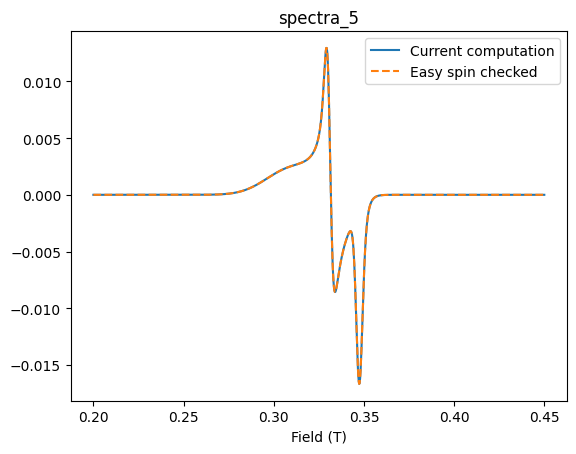

In [23]:
name = "spectra_5"

g_interaction = mars.spin_model.Interaction([2.12, 2.02, 2.30], dtype=dtype)


freq = 9.81 * 1e9
gauss = 0.0
lorentz = 0.0
ham_strain = torch.tensor([100, 100, 1e3], dtype=dtype) * 1e6
temp = 293

spin_system = mars.spin_model.SpinSystem(
    electrons=[1/2],
    g_tensors=[g_interaction],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(40,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(0.2, 0.45, 1000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [21]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

{}


### System_6

Text(0.5, 1.0, 'spectra_6')

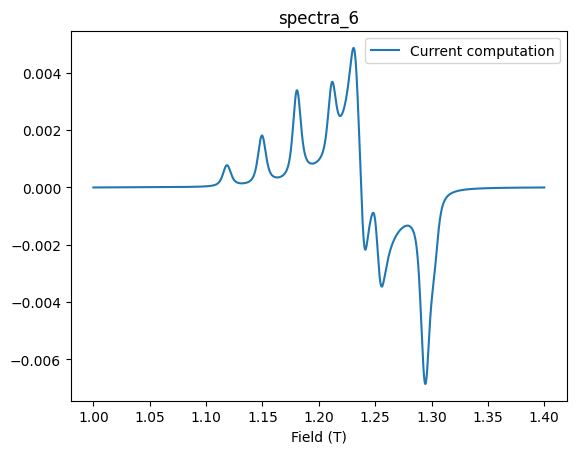

In [45]:
name = "spectra_6"

g_interaction = mars.spin_model.Interaction([2.1, 2.2, 2.3], dtype=dtype)
hyperfine_interaction = mars.spin_model.Interaction([10 * 1e6, 10 * 1e6, 1e3 * 1e6], dtype=dtype)

freq = 38.0 * 1e9
gauss = 5e-3
lorentz = 5e-3
ham_strain = 0.0
temp = 293

spin_system = mars.spin_model.SpinSystem(
    electrons=[1/2],
    nuclei=["14N", "14N"],
    g_tensors=[g_interaction],
    electron_nuclei=[(0, 0, hyperfine_interaction), (0, 1, hyperfine_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(50,40)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(1.0, 1.4, 1500, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
#plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [46]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

{}


### System_7

Text(0.5, 1.0, 'spectra_7')

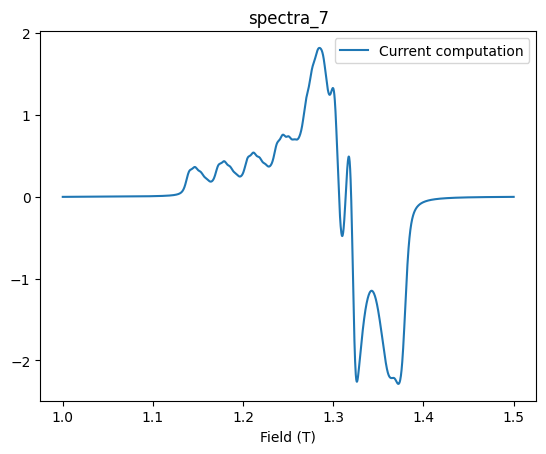

In [4]:
name = "spectra_7"

g_interaction = mars.spin_model.Interaction([2.0, 2.1, 2.2], dtype=dtype)
hyperfine_interaction = mars.spin_model.Interaction([100.0 * 1e6, 100 * 1e6, 1e3 * 1e6], dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([-1.0e8, 0.0], dtype=dtype)


freq = 38.0 * 1e9
gauss = 5e-3
lorentz = 5e-3
ham_strain = 0.0
temp = 3.5

spin_system = mars.spin_model.SpinSystem(
    electrons=[5/2],
    nuclei=["55Mn"],
    g_tensors=[g_interaction],
    electron_electron=[(0, 0, DE_interaction)],
    electron_nuclei=[(0, 0, hyperfine_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(35, 35)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(1.0, 1.5, 2000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [5]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)

### System 8

Text(0.5, 1.0, 'spectra_8')

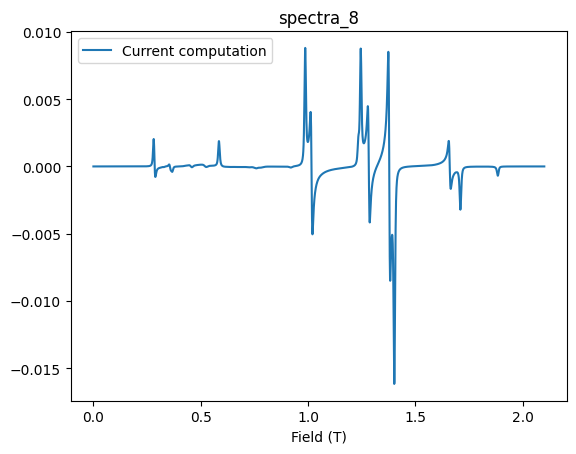

In [6]:
name = "spectra_8"

g_interaction = mars.spin_model.Interaction([2.0, 2.06, 2.2], dtype=dtype)
DE_interaction = mars.spin_model.DEInteraction([1e10, 0.0], dtype=dtype)


freq = 38.0 * 1e9
gauss = 5e-3
lorentz = 5e-3
ham_strain = 0.0
temp = 293.0

spin_system = mars.spin_model.SpinSystem(
    electrons=[3/2],
    g_tensors=[g_interaction],
    electron_electron=[(0, 0, DE_interaction)],
    dtype=dtype,
)

sample = mars.spin_model.MultiOrientedSample(
    base_spin_system=spin_system,
    gauss=gauss,
    lorentz=lorentz,
    ham_strain=ham_strain,
    dtype=dtype,
    mesh=(70,30)
)


spectra_creator = mars.spectra_manager.StationarySpectra(
    sample=sample,
    freq=freq,
    temperature=temp,
    dtype=dtype,
)

fields = torch.linspace(0.0, 2.1, 3000, dtype=dtype)
spectrum = spectra_creator(sample, fields=fields)

plt.plot(fields, spectrum, "-", label="Current computation")
#plt.plot(*read_csv(name), "--", label="Easy spin checked")
plt.xlabel("Field (T)")
plt.legend()
plt.title(f"{name}")

In [7]:
mars.save(".\example_parameters.mat", sample=sample, spectra_creator=spectra_creator, field=fields, format_type="easyspin")

import pandas as pd
data_frame = pd.DataFrame({"field": fields, "spec": spectrum})
data_frame.to_csv(f".\easy_spin_checked\{name}.csv", header=False, index=False)